In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_regression

In [6]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [7]:
X

array([[ 0.17838804, -0.81387268],
       [ 0.17601254, -0.26732803],
       [ 1.36934064,  0.51034056],
       ...,
       [ 0.81849711, -0.93467236],
       [-0.60093856,  1.25973593],
       [-1.58208849,  0.27939631]])

In [8]:
y

array([ 3.40076907e+00,  7.56983057e+00,  9.33848765e+01,  6.97471300e+01,
        7.30421636e+01,  3.42883304e+01,  6.12559443e+01, -1.20667262e+00,
        3.39412915e+01,  5.68511842e+01,  2.56361003e+01,  4.38633480e+00,
       -3.94314101e+01, -8.56680666e+01, -5.71920211e+01, -2.36301373e+01,
        6.18757298e-01,  4.09022994e+01, -4.03753900e+01, -4.73509584e+01,
       -2.38300991e+01,  1.62200893e+00,  6.11033291e+01,  1.07651623e+01,
       -5.71515576e+01, -4.55172555e+01,  5.38866181e+01,  1.32755380e+01,
       -4.89224810e+01,  3.32747702e+00, -6.28399190e+01, -1.74090522e+02,
       -1.65877707e+02, -4.56033592e+01, -5.57848663e+01, -6.29166001e+00,
        4.79122848e+01,  6.15445563e+01,  2.80412109e+01,  5.66825060e+00,
        1.18533496e+02, -1.07704150e+02, -2.76646118e+00, -1.45851207e+00,
       -1.93278131e+01, -2.21510814e+01, -4.51599285e+01,  9.32965715e+00,
        7.92214494e+01,  2.00549852e+01,  1.01297808e+01, -4.64450720e+01,
       -5.47740337e+01, -

<AxesSubplot: xlabel='0', ylabel='1'>

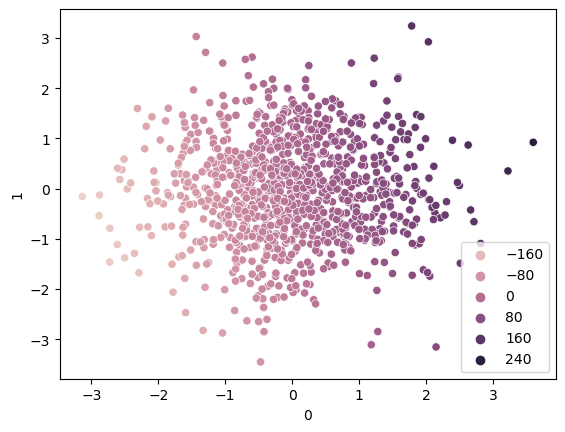

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=42)

In [16]:
from sklearn.svm import SVR

In [20]:
svr=SVR(kernel="linear")

In [21]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [22]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [26]:
svr.coef_

array([[63.54359595, 15.4804313 ]])

In [24]:
from sklearn.metrics import r2_score

In [27]:
y_pred=svr.predict(x_test)

In [28]:
print(r2_score(y_test,y_pred))

0.9980648686730592


In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid={
    "C":[0.1,1,10,100],
    "gamma":[1,0.1,0.001,0.0001],
    "epsilon":[0.1,0.3,0.2]
}

In [32]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [33]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.090 total time=   0.0s
[CV 2/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.094 total time=   0.0s
[CV 3/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.074 total time=   0.0s
[CV 4/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.077 total time=   0.0s
[CV 5/5] END .......C=0.1, epsilon=0.1, gamma=1;, score=0.083 total time=   0.0s
[CV 1/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.100 total time=   0.0s
[CV 2/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.104 total time=   0.0s
[CV 3/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.097 total time=   0.0s
[CV 4/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.100 total time=   0.0s
[CV 5/5] END .....C=0.1, epsilon=0.1, gamma=0.1;, score=0.100 total time=   0.0s
[CV 1/5] END ..C=0.1, epsilon=0.1, gamma=0.001;, score=-0.002 total time=   0.0s
[CV 2/5] END ...C=0.1, epsilon=0.1, gamma=0.001

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.3, 0.2],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             verbose=3)

In [34]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 0.1}

In [35]:
y_pred=grid.predict(x_test)